# Data Processor

#### Given a csv file with relations of the form 'head', 'type', and 'tail' format, this file implements methods to get sub dataframes.

In [30]:
import networkx as nx
import pandas as pd
from collections import Counter


In [ ]:
#

In [52]:
class DataProcessor():
    
    # Contructing the object
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        word_counter = Counter()
        relations_counter = Counter()
        
        for index, row in self.df.iterrows():
            word_counter.update([row['head'], row['tail']])
            relations_counter.update([row['type']])
        self.word_counter = word_counter
        self.relations_counter = relations_counter
    
    # This method accepts relations as input and
    # outputs the sub-dataframe with the wanted relations.
    def get_df_with_relation(self, *relations):
        mp = {0:'head', 1:'type', 2:'tail'}
        columns = ['head', 'type','tail']
        new_df = pd.DataFrame(columns=columns) 
        for index, row in self.df.iterrows():
            if row['type'] in relations:
                new_df.loc[len(new_df)] = [row[mp[i]] for i in range(3)]
        return new_df       
    
    # This method accepts words as input and
    # outputs the sub-dataframe with the wanted words.
    def get_df_with_word(self, *words):        
        mp = {0:'head', 1:'type', 2:'tail'}
        columns = ['head', 'type','tail']
        new_df = pd.DataFrame(columns=columns) 
        for index, row in self.df.iterrows():
            if row['head'] in words or row['tail'] in words:
                new_df.loc[len(new_df)] = [row[mp[i]] for i in range(3)]
        return new_df
    
    # This method accepts words and relations as input and
    # outputs the sub-dataframe with the wanted words and relations.
    def get_df_with_word_relation(self, words=[], relations=[]):
        mp = {0:'head', 1:'type', 2:'tail'}
        columns = ['head', 'type','tail']
        new_df = pd.DataFrame(columns=columns) 
        for index, row in self.df.iterrows():
            if (row['head'] in words or row['tail'] in words) and row['type'] in relations:
                new_df.loc[len(new_df)] = [row[mp[i]] for i in range(3)]
        return new_df

    
        


In [53]:
file_path = 'data/filtered_triplets.csv'

In [54]:
generator = DataProcessor(file_path)

In [55]:
generator.word_counter.most_common()

[('SARS CoV 2', 89),
 ('COVID 19', 60),
 ('RNA', 51),
 ('DNA', 50),
 ('China', 47),
 ('Brazil', 44),
 ('mRNA', 39),
 ('taxa', 29),
 ('United States', 28),
 ('T cell', 26),
 ('miRNA', 24),
 ("Alzheimer's disease", 24),
 ('in vitro', 23),
 ('in vivo', 22),
 ('domains', 22),
 ('IL 6', 21),
 ('MRI', 21),
 ('TNF α', 20),
 ('HIV', 19),
 ('EGFR', 19),
 ('GWAS', 19),
 ('PubMed', 18),
 ('CRISPR', 18),
 ('HBV', 18),
 ('COVID 19 pandemic', 17),
 ('miRNAs', 17),
 ('Omicron', 17),
 ('C', 17),
 ('USA', 17),
 ('NF κB', 16),
 ('AMPK', 16),
 ('Canada', 14),
 ('non small cell lung cancer', 14),
 ('Protein', 14),
 ('Cas9', 13),
 ('severe acute respiratory syndrome coronavirus 2', 13),
 ('control group', 13),
 ('CKD', 13),
 ('IL 1β', 13),
 ('OSCC', 13),
 ('B', 13),
 ('GBM', 13),
 ('Mn', 12),
 ('Europe', 12),
 ('OS', 12),
 ('NIH', 12),
 ('NSCLC', 12),
 ('Illumina', 11),
 ('Japan', 11),
 ('Russia', 11),
 ('T2DM', 11),
 ('R', 11),
 ('Sanger sequencing', 11),
 ('Spain', 11),
 ('India', 11),
 ('PDAC', 11),
 ('

In [56]:
df_opp = generator.get_df_with_relation('instance of')


In [60]:
generator.get_df_with_word('SARS CoV 2')

,head,type,tail
0,COVID pandemic,has cause,SARS CoV 2
1,SARS CoV 2,has effect,COVID pandemic
2,SARS CoV 2,has part,Alpha
3,SARS CoV 2,has part,Delta
4,SARS CoV 2,has part,Omicron
...,...,...,...
84,SARS CoV 2,has effect,ongoing pandemic
85,ongoing pandemic,has cause,SARS CoV 2
86,MIS C,has effect,SARS CoV 2
87,SARS CoV 2,has effect,MIS C


In [61]:
generator.relations_counter.most_common

<bound method Counter.most_common of Counter({'subclass of': 2741, 'part of': 1384, 'has part': 1348, 'instance of': 1052, 'opposite of': 676, 'different from': 554, 'has effect': 542, 'has cause': 515, 'facet of': 488, 'subject has role': 310, 'parent taxon': 281, 'use': 264, 'country': 235, 'medical condition treated': 214, 'drug used for treatment': 191, 'followed by': 141, 'studied by': 132, 'uses': 128, 'studies': 117, 'follows': 110, 'contains administrative territorial entity': 67, 'located in the administrative territorial entity': 63, 'connects with': 60, 'shares border with': 55, 'said to be the same as': 53, 'point in time': 50, 'product or material produced': 47, 'encodes': 45, 'taxonomic type': 45, 'used by': 36, 'parent organization': 26, 'subsidiary': 25, 'developer': 24, 'main subject': 23, 'continent': 21, 'field of work': 18, 'country of origin': 15, 'author': 14, 'programming language': 14, 'number of participants': 13, 'capital': 13, 'location': 11, 'diplomatic rela

In [62]:
df_opp

,head,type,tail
0,arginine serine rich,instance of,domain
1,Metabolic scaling,instance of,inverse correlation
2,WRAB18,instance of,promoter sequence
3,cociente de riesgos instantáneos,instance of,intervalos de confianza
4,Little's Irregularity Index,instance of,notificación
...,...,...,...
1047,glutathione peroxidase 1,instance of,oxidative stress markers
1048,individual milk urea concentration,instance of,indicator trait
1049,Dynamic protein phosphorylation and dephosphor...,instance of,regulatory mechanisms
1050,Pleistocene,instance of,climate oscillations


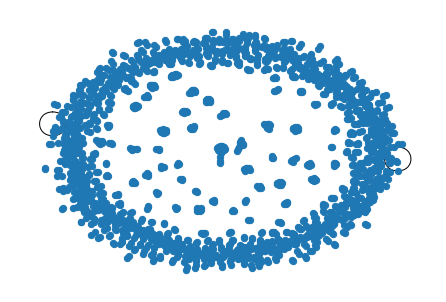

In [50]:
G = nx.from_pandas_edgelist(df_opp,'head', 'tail')
pos = nx.spring_layout(G)
nx.draw(G,node_size= 40, with_labels=False)

In [66]:
df_opp = generator.get_df_with_word_relation(relations=['has cause'],words=['SARS CoV 2'])



In [67]:
df_opp.to_csv("data/encodesproteion.csv")



In [69]:
generator.get_df_with_word('SARS CoV 2')

,head,type,tail
0,COVID pandemic,has cause,SARS CoV 2
1,SARS CoV 2,has effect,COVID pandemic
2,SARS CoV 2,has part,Alpha
3,SARS CoV 2,has part,Delta
4,SARS CoV 2,has part,Omicron
...,...,...,...
84,SARS CoV 2,has effect,ongoing pandemic
85,ongoing pandemic,has cause,SARS CoV 2
86,MIS C,has effect,SARS CoV 2
87,SARS CoV 2,has effect,MIS C
